<a href="https://colab.research.google.com/github/kimhwijin/HandsOnMachineLearing/blob/main/ModelTraining_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

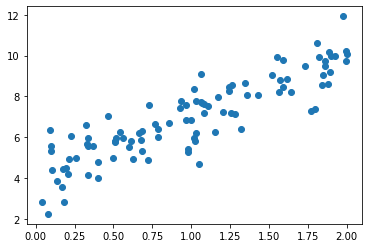

In [2]:
#Model Training

#정규방정식 증명
#theta_hat = (X.T X)^-1 X.T Y 
import numpy as np
import matplotlib.pyplot as plt
X = 2 * np.random.rand(100 ,1)
y = 4 + 3 * X + np.random.randn(100, 1) # 기대 파라미터 : 4, 3
plt.plot(X, y, 'o')

In [4]:
#정규방정식을 통한 theta 계산
X_b = np.c_[np.ones((100, 1)), X] #샘플에 x0 = 1 을 추가
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
print(theta_best)
#random.randn 가우시안 noise 때문에 정확한 예측은 안됌

[[4.07279024]
 [2.92365858]]


[[4.07279024]
 [9.92010739]]


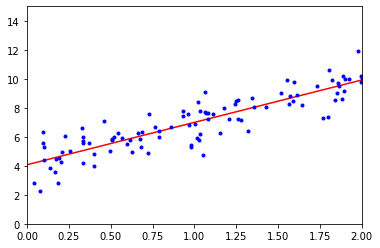

In [6]:
X_new = np.array([[0], [2]])
X_new_b =  np.c_[np.ones((2,1)), X_new]
y_predict = X_new_b.dot(theta_best)
print(y_predict)
plt.plot(X_new, y_predict, 'r-')
plt.plot(X,y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

In [9]:
#사이킷런의 선형 회귀
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
print(lin_reg.intercept_, lin_reg.coef_)
print(lin_reg.predict(X_new))

#LinearRegression -> 최소 제곱을 기반으로함
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
print(theta_best_svd)

#theta_hat = X^+ y 를 계산한다. X^+ 는 유사역행렬(무어-펜로즈 역행렬)
print(np.linalg.pinv(X_b).dot(y))

[4.07279024] [[2.92365858]]
[[4.07279024]
 [9.92010739]]
[[4.07279024]
 [2.92365858]]
[[4.07279024]
 [2.92365858]]


[[4.07279024]
 [2.92365858]]


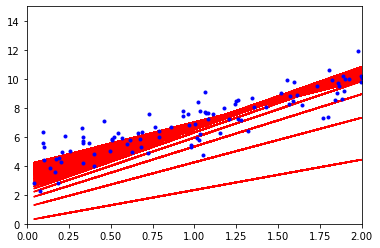

In [15]:
#경사 하강법
eta = 0.1 #0.02 #0.5
n_iterations = 1000
m = 100

theta = np.random.randn(2,1)

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta)- y)
    theta = theta - eta * gradients
    plt.plot(X, X_b.dot(theta), 'r-')
print(theta)

plt.plot(X,y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()